In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
mainpath = "C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/datasets/ads"
filename = "advertising.csv"
fullfile = mainpath + "/" + filename
data_ads = pd.read_csv(fullfile)
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
len(data_ads)

200

In [4]:
data_ads["corn_TV"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [5]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corn_TV
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [6]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [7]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corn_TV,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [8]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corn_TV,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [10]:
corr_pearson = sum(data_ads["corn_TV"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [11]:
corr_pearson

0.782224424861606

In [16]:
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    data_ads["corr1"] = (data_ads[var1] - np.mean(data_ads[var1]))**2
    data_ads["corr2"] = (data_ads[var2] - np.mean(data_ads[var2]))**2
    corr_pearson = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))
    return corr_pearson
    

In [17]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [22]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [23]:
for x in cols:
    for y in cols:
        print (x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


Text(0.5, 1.0, 'Gasto TV vs Venta Producto')

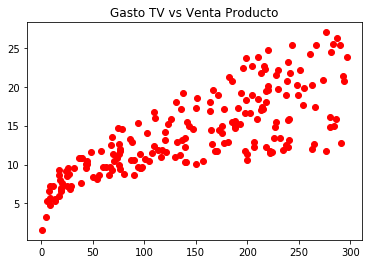

In [30]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto TV vs Venta Producto")

Text(0.5, 1.0, 'Gasto Radio vs Venta Producto')

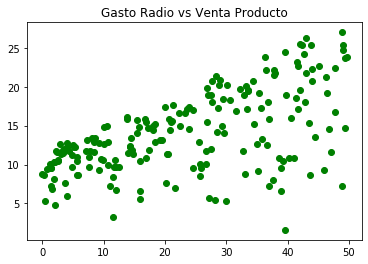

In [33]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto Radio vs Venta Producto")

Text(0.5, 1.0, 'Gasto Periodico vs Venta Producto')

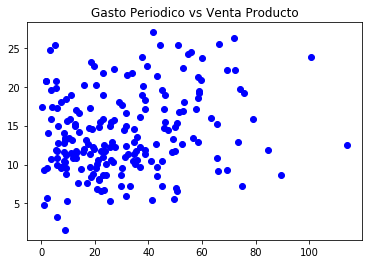

In [35]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto Periodico vs Venta Producto")

In [38]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


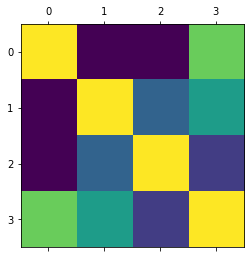

In [39]:
plt.matshow(data_ads.corr())